<a href="https://colab.research.google.com/github/mofaah/mofaah/blob/main/concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [36]:
c = pd.read_csv('/content/drive/MyDrive/concrete_data.csv')
c.head(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [103]:
c.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


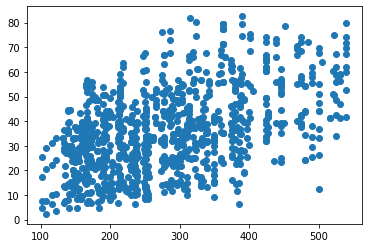

In [104]:
plt.scatter(c['cement'], c['concrete_compressive_strength'])

In [105]:
c.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [106]:
X = c[['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']]
y = c['concrete_compressive_strength']       

In [107]:
mms = MinMaxScaler()

In [108]:
X = mms.fit_transform(X)

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20)
X_train


array([[0.42077626, 0.5589872 , 0.        , ..., 0.59186047, 0.52609132,
        0.00549451],
       [0.33835616, 0.46410684, 0.        , ..., 0.51337209, 0.25112895,
        0.00549451],
       [0.20159817, 0.        , 0.62568716, ..., 0.83459302, 0.52333166,
        0.27197802],
       ...,
       [0.15273973, 0.11741792, 0.62118941, ..., 0.81337209, 0.50727546,
        0.07417582],
       [0.63926941, 0.        , 0.        , ..., 0.71511628, 0.36377321,
        0.07417582],
       [0.12054795, 0.51029494, 0.        , ..., 0.22151163, 0.68665329,
        0.07417582]])

In [94]:
rgr = RandomForestRegressor()


In [127]:
model = rgr.fit(X_train, y_train)
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [60]:
n_estimators= [int(x) for x in np.linspace(start=300, stop = 2000, num = 10)]

max_features=['auto', 'sqrt', 'log2']

max_depth = [int(x) for x in np.linspace(10, 1000, 10)]

min_samples_split=[2, 5, 10, 14]

min_samples_leaf=[1, 2, 4, 6, 8]

random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                 'min_samples_leaf':min_samples_leaf,
                 }
print(random_grid)


{'n_estimators': [300, 488, 677, 866, 1055, 1244, 1433, 1622, 1811, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [62]:
rsv = RandomizedSearchCV(estimator=rgr,param_distributions=random_grid, n_iter=50, cv = 3, random_state=100)
rsv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [63]:
rsv.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 677}

In [135]:
rfr = RandomForestRegressor(n_estimators=677, max_depth=10, max_features='auto' )
model_1 = rfr.fit(X_train,y_train)
print(model_1.score(X_train,y_train))
print(model_1.score(X_test,y_test))

0.9802233611482232
0.8874208191657627


In [137]:
predictions = model_1.predict(X_test)
print(predictions)


[42.0085307   8.90754741 47.00520172 59.55920415 32.10840467 18.05490542
 33.326832   22.57117269 47.78778419 15.03940014 27.29638183 31.06023313
 51.87178311 14.8267589  11.58860036 35.63325634 57.09487193 15.10116894
 37.90941142 40.85150537 22.97288597 51.76155586 48.4040623  71.08492132
 21.44532836 24.29350223 45.10570792 33.26770661 66.23264112 34.65858661
 43.28972218 33.13108805 26.77899253 17.09905029 66.19497037 44.82982969
 41.02654917 36.92352812 54.31959963 26.0350793  65.3486555  55.31509008
  9.7797358  39.29359175 67.38391922 72.47863285 70.69468371 63.84445062
 37.11373974 59.55920415 26.6173345   9.96763602 44.70986822 17.04984552
 38.3996288  47.95629844 21.22284859 60.63834253 19.76544077 36.45104535
 17.8961973  77.20447513 34.0611155  68.71049625 79.14198417 32.10127503
 14.17117206 39.37757416 39.99746122 37.3437604  24.10451697 44.37797814
 29.31195904 38.48866973 36.43243276 28.66290804 51.34198591 35.21701083
 14.33310333 40.81563284 35.45968641 54.11744094 59